In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [26]:
#load data from file
df = pd.read_csv('v2.csv')
df.head(48)

,skew,kurt,std_dev,rms,range,shannon,defect_loc
0,0.028187,2.895937,0.150426,0.150494,1.175218,2821.624816,2
1,0.019655,2.822204,0.154229,0.154273,1.233532,2934.811103,2
2,0.014435,2.941275,0.156030,0.156086,1.392069,2957.736643,2
3,0.032114,2.857819,0.146695,0.146754,1.122589,2735.801246,2
4,0.010124,2.777602,0.146847,0.146923,1.124863,2753.138769,2
5,0.038872,2.857723,0.148002,0.148075,1.134934,2763.852117,2
6,-0.007646,2.927729,0.139692,0.139748,1.091402,2544.735660,2
7,0.021548,3.001880,0.137873,0.137922,1.231096,2488.366997,2
8,0.008909,2.962560,0.139476,0.139529,1.251075,2536.511612,2
9,-0.002761,3.038869,0.141422,0.141848,1.175056,2606.898126,2


In [27]:
df['defect_loc'].value_counts()

4    12
3    12
2    12
1    12
Name: defect_loc, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8E6F748D0>]],
      dtype=object)

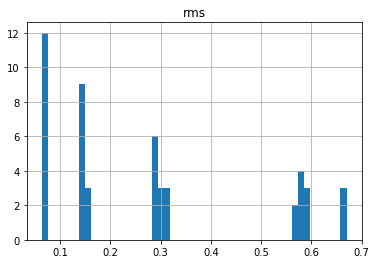

In [28]:
df.hist(column='rms', bins=50)

In [29]:
df.columns

Index(['skew', 'kurt', 'std_dev', 'rms', 'range', 'shannon', 'defect_loc'], dtype='object')

In [30]:
X = df[['skew', 'kurt','std_dev', 'rms', 'range', 'shannon']] .values#.astype(float)
X[0:5]

array([[2.8187e-02, 2.8959e+00, 1.5043e-01, 1.5049e-01, 1.1752e+00,
        2.8216e+03],
       [1.9655e-02, 2.8222e+00, 1.5423e-01, 1.5427e-01, 1.2335e+00,
        2.9348e+03],
       [1.4435e-02, 2.9413e+00, 1.5603e-01, 1.5609e-01, 1.3921e+00,
        2.9577e+03],
       [3.2114e-02, 2.8578e+00, 1.4670e-01, 1.4675e-01, 1.1226e+00,
        2.7358e+03],
       [1.0124e-02, 2.7776e+00, 1.4685e-01, 1.4692e-01, 1.1249e+00,
        2.7531e+03]])

In [31]:
y = df['defect_loc'].values
y[0:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4], dtype=int64)

In [32]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])
#standard deviation=1 and mean =0

[[2.8187e-02 2.8959e+00 1.5043e-01 1.5049e-01 1.1752e+00 2.8216e+03]
 [1.9655e-02 2.8222e+00 1.5423e-01 1.5427e-01 1.2335e+00 2.9348e+03]
 [1.4435e-02 2.9413e+00 1.5603e-01 1.5609e-01 1.3921e+00 2.9577e+03]
 [3.2114e-02 2.8578e+00 1.4670e-01 1.4675e-01 1.1226e+00 2.7358e+03]
 [1.0124e-02 2.7776e+00 1.4685e-01 1.4692e-01 1.1249e+00 2.7531e+03]]


[<matplotlib.lines.Line2D object at 0x000001E8E7090630>, <matplotlib.lines.Line2D object at 0x000001E8E7090780>, <matplotlib.lines.Line2D object at 0x000001E8E70908D0>, <matplotlib.lines.Line2D object at 0x000001E8E7090A20>, <matplotlib.lines.Line2D object at 0x000001E8E7090B70>, <matplotlib.lines.Line2D object at 0x000001E8E7090CC0>]


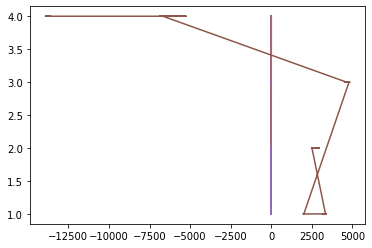

In [33]:
print(plt.plot(X,y))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.7, random_state=42)
print('Train set:', X_train.shape,  y_train.shape )
print('Test set:', X_test.shape,  y_test.shape)

Train set: (14, 6) (14,)
Test set: (34, 6) (34,)


In [35]:
'''X_train = X
X_test = X
y_train = y
y_test = y'''

'X_train = X\nX_test = X\ny_train = y\ny_test = y'

In [36]:
#building classifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#number of neighbors
k=1

In [38]:
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [39]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 4, 3, 4, 3], dtype=int64)

In [40]:
y_train[0:]

array([4, 3, 1, 4, 2, 1, 1, 4, 1, 2, 4, 1, 3, 4], dtype=int64)

In [41]:
#try all three scores
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9411764705882353


In [42]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2,3,4]))

[[ 7  0  0  0]
 [ 2  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  7]]


Confusion matrix, without normalization
[[ 7  0  0  0]
 [ 2  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  7]]


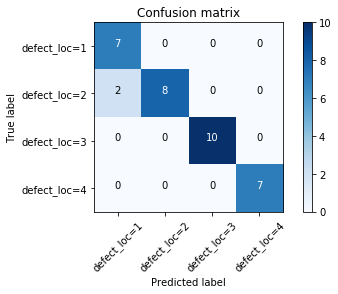

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4])
np.set_printoptions(precision=4)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['defect_loc=1','defect_loc=2','defect_loc=3','defect_loc=4'],normalize= False,  title='Confusion matrix')

In [44]:
#predict a particular value
'''df1 = pd.read_csv('test_file.csv')
tv= df1[['skew', 'kurt','std_dev', 'rms', 'range', 'shannon']] .values#.astype(float)
print(tv)
yh = neigh.predict(tv)

print('prediction = ',yh)

print('actual = ',df1['defect_loc'].values)'''

"df1 = pd.read_csv('test_file.csv')\ntv= df1[['skew', 'kurt','std_dev', 'rms', 'range', 'shannon']] .values#.astype(float)\nprint(tv)\nyh = neigh.predict(tv)\n\nprint('prediction = ',yh)\n\nprint('actual = ',df1['defect_loc'].values)"

In [45]:
#code for finding the best k
Ks = len(X_train)+1
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9412, 0.9412, 0.9412, 0.4118, 0.4118, 0.4118, 0.4118, 0.4118,
       0.4118, 0.4118, 0.4118, 0.2059, 0.2059, 0.2059])

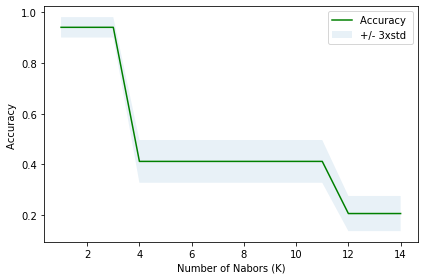

In [46]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9411764705882353 with k= 1
